In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#from sklearn import preprocessing
#from sklearn import utils

In [3]:
#reading CSV file downloaded from ICAO

metar=pd.read_csv('Weather Condition Current METAR.csv')

In [4]:
#reading list of columns
metar.columns

Index(['airport', 'airport_name', 'countryCode', 'date', 'datetime',
       'raw_metar', 'visibility', 'wind', 'precipitation', 'freezing',
       'dangerous', 'VMC_IMC', 'latitude', 'longitude'],
      dtype='object')

In [5]:
#taking count of rows inside file

metar.count()

airport          3637
airport_name     3637
countryCode      3637
date             3637
datetime         3636
raw_metar        3637
visibility       3637
wind             3637
precipitation    3637
freezing         3637
dangerous        3637
VMC_IMC          3637
latitude         3637
longitude        3637
dtype: int64

In [6]:
#Checking df from the top

metar.head()

,airport,airport_name,countryCode,date,datetime,raw_metar,visibility,wind,precipitation,freezing,dangerous,VMC_IMC,latitude,longitude
0,EGUO,COLERNE,GBR,19-02-14,"""2019-02-14T22:50:00.000Z""",EGUO 142250Z 06001KT CAVOK 01/00 Q1029 BLU NOS...,0,0,0.0,2.5,0.0,0,51.441078,-2.279081
1,KEUF,WEEDON FIELD,USA,19-03-04,"""2019-03-04T18:58:00.000Z""",KEUF 041858Z AUTO A3010 RMK AO2 RAEMM TSB02B32...,0,0,0.0,0.0,0.0,0,31.951306,-85.128917
2,LLET,EILAT/J. HOZMAN AIRPORT,ISR,19-03-18,"""2019-03-18T15:50:00.000Z""",LLET 181550Z 02016KT CAVOK 24/M01 Q1016 19-03-18,0,2,0.0,0.0,0.0,0,29.558333,34.958889
3,KLBT,LUMBERTON RGNL,USA,19-03-28,"""2019-03-28T13:55:00.000Z""",KLBT 281355Z MKT MSM M M M M A0000 M M RMK TES...,0,0,0.0,0.0,0.0,0,34.609806,-79.059556
4,EDOP,SCHWERIN-PARCHIM,DEU,19-03-31,"""2019-03-31T14:50:00.000Z""",EDOP 311450Z 35010KT 310V020 CAVOK 09/M06 Q102...,0,0,0.0,0.0,0.0,0,53.426997,11.783436


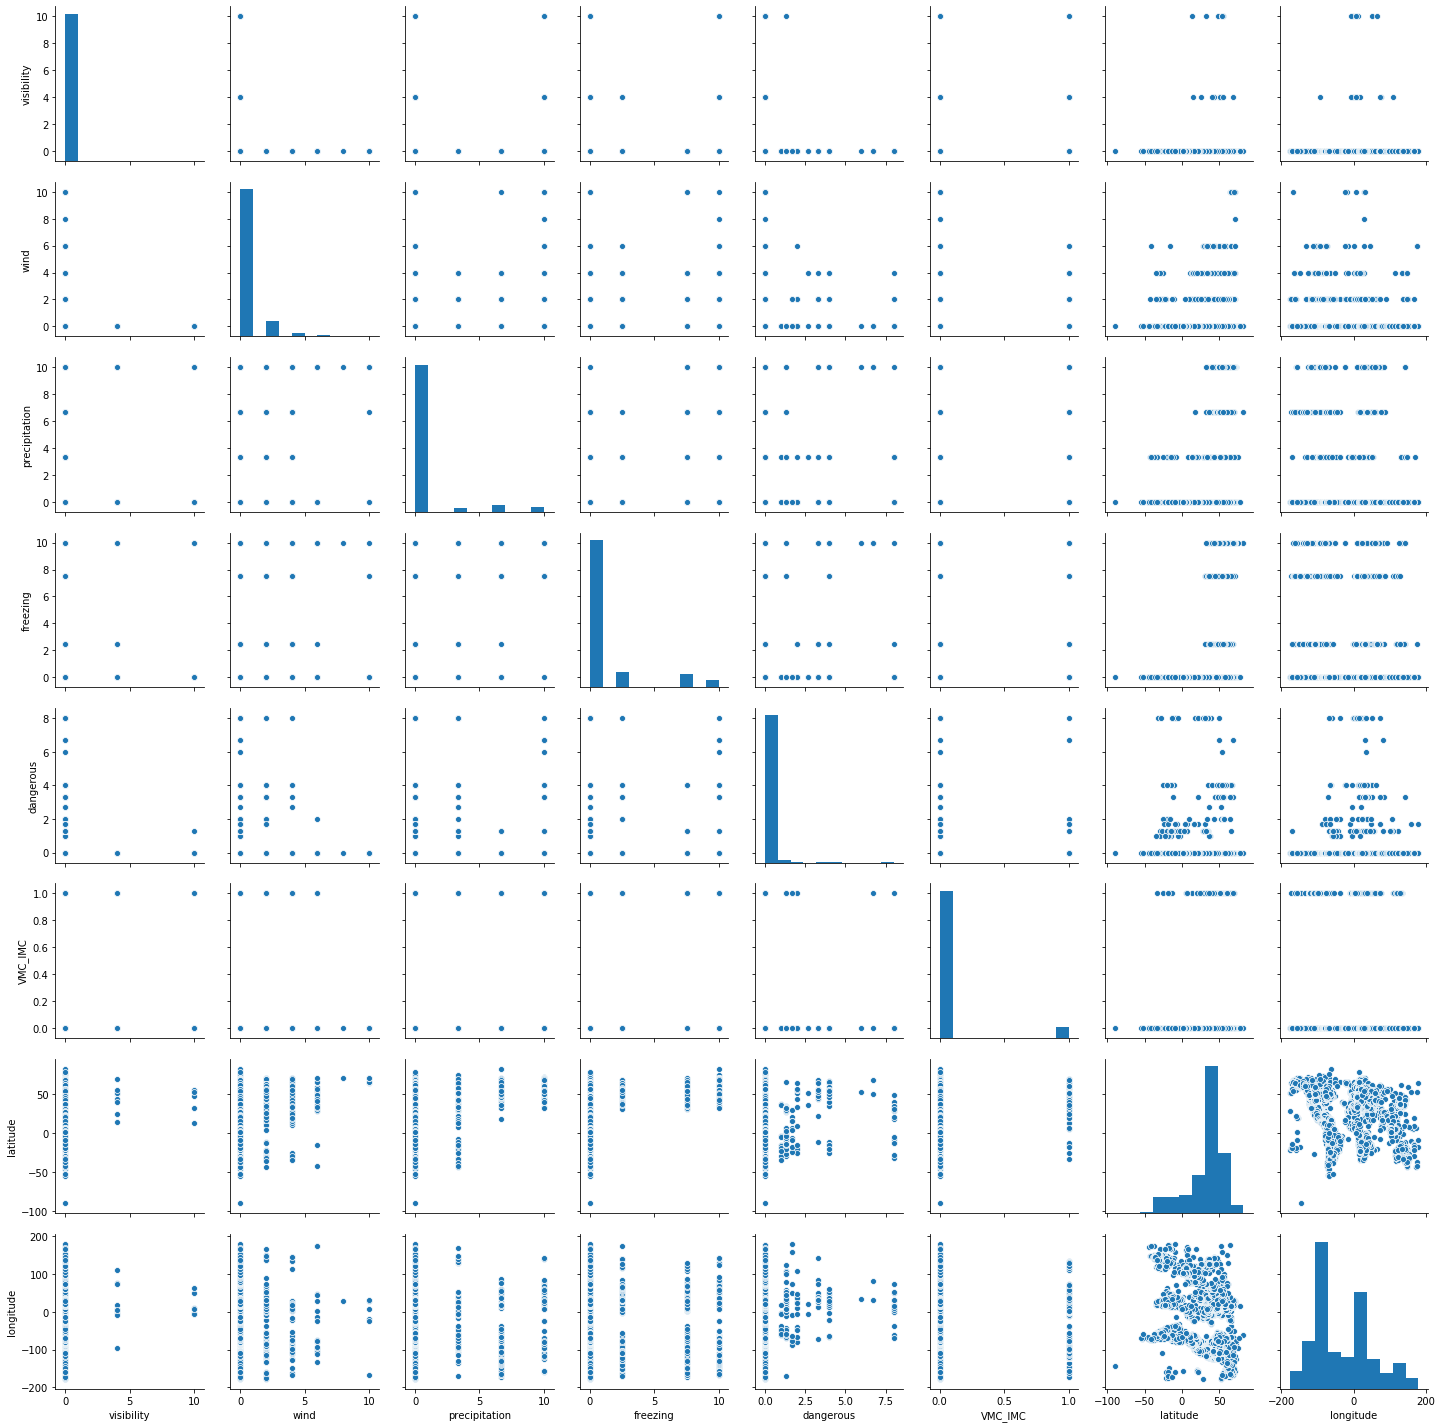

In [7]:
#checking seaborn pairplot to observe if its look like NON-LINEAR

sns.pairplot(metar)

In [8]:
#taking mean value of dangerous column to ascertain safe or unsafe
#1 means unsafe
#0 means safe

mean =metar["dangerous"].mean()
mean
metar['dangerous'] = np.where(metar['dangerous'] >= mean, 1,0)


In [9]:
#takiing mean value
mean

0.11413252680780873

In [10]:
#checking changed METAR Dataframe

metar.head()

,airport,airport_name,countryCode,date,datetime,raw_metar,visibility,wind,precipitation,freezing,dangerous,VMC_IMC,latitude,longitude
0,EGUO,COLERNE,GBR,19-02-14,"""2019-02-14T22:50:00.000Z""",EGUO 142250Z 06001KT CAVOK 01/00 Q1029 BLU NOS...,0,0,0.0,2.5,0,0,51.441078,-2.279081
1,KEUF,WEEDON FIELD,USA,19-03-04,"""2019-03-04T18:58:00.000Z""",KEUF 041858Z AUTO A3010 RMK AO2 RAEMM TSB02B32...,0,0,0.0,0.0,0,0,31.951306,-85.128917
2,LLET,EILAT/J. HOZMAN AIRPORT,ISR,19-03-18,"""2019-03-18T15:50:00.000Z""",LLET 181550Z 02016KT CAVOK 24/M01 Q1016 19-03-18,0,2,0.0,0.0,0,0,29.558333,34.958889
3,KLBT,LUMBERTON RGNL,USA,19-03-28,"""2019-03-28T13:55:00.000Z""",KLBT 281355Z MKT MSM M M M M A0000 M M RMK TES...,0,0,0.0,0.0,0,0,34.609806,-79.059556
4,EDOP,SCHWERIN-PARCHIM,DEU,19-03-31,"""2019-03-31T14:50:00.000Z""",EDOP 311450Z 35010KT 310V020 CAVOK 09/M06 Q102...,0,0,0.0,0.0,0,0,53.426997,11.783436


In [11]:
#creating another df named factor with relevant columns for processing

factor= metar.filter(['visibility', 'wind', 'precipitation', 'freezing', 'VMC_IMC'],axis=1)

In [12]:
#cheking if its showing right ones

factor.head()

,visibility,wind,precipitation,freezing,VMC_IMC
0,0,0,0.0,2.5,0
1,0,0,0.0,0.0,0
2,0,2,0.0,0.0,0
3,0,0,0.0,0.0,0
4,0,0,0.0,0.0,0


In [13]:
#Changing data type of all columns to float64


metar['dangerous'] = metar['dangerous'].astype(np.float64)
metar['visibility'] = metar['visibility'].astype(np.float64)
metar['wind'] = metar['wind'].astype(np.float64)
metar['VMC_IMC'] = metar['VMC_IMC'].astype(np.float64)

In [14]:
metar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 14 columns):
airport          3637 non-null object
airport_name     3637 non-null object
countryCode      3637 non-null object
date             3637 non-null object
datetime         3636 non-null object
raw_metar        3637 non-null object
visibility       3637 non-null float64
wind             3637 non-null float64
precipitation    3637 non-null float64
freezing         3637 non-null float64
dangerous        3637 non-null float64
VMC_IMC          3637 non-null float64
latitude         3637 non-null float64
longitude        3637 non-null float64
dtypes: float64(8), object(6)
memory usage: 397.9+ KB


In [15]:
#separating train and test data set with test set as 30%

X = factor
y = metar['dangerous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
model = SVC(gamma='auto', kernel='sigmoid')

In [17]:
#fitting model

model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
predictions = model.predict(X_test)

In [19]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1056    0]
 [  36    0]]


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1056
         1.0       0.00      0.00      0.00        36

    accuracy                           0.97      1092
   macro avg       0.48      0.50      0.49      1092
weighted avg       0.94      0.97      0.95      1092



C:\Users\konar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
#As we are getting class 1.0 as 0.00 under all of the Precision, Recall, and F1
#We are finding better parameters for C and Gamma values


In [21]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [22]:
#using GRidSEarchCV to find better values of C and Gamma

grid = GridSearchCV(SVC(),param_grid,verbose=4)

In [23]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.959, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.959, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

C:\Users\konar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.1, gamma=0.001, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.959, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.959, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.958, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [24]:
#printing best values for C and Gamma
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [25]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
grid_predictions = grid.predict(X_test)

In [27]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[1056    0]
 [  36    0]]


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1056
         1.0       0.00      0.00      0.00        36

    accuracy                           0.97      1092
   macro avg       0.48      0.50      0.49      1092
weighted avg       0.94      0.97      0.95      1092



C:\Users\konar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
#Still getting the same result, so sticking with it